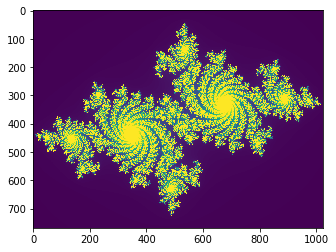

In [1]:
"""
julia - Implement the Julia set in Python using matplotlib & numpy
Fractals with Python - Part I https://blog.anvetsu.com/posts/fractals-julia-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

"""

import matplotlib.pyplot as plt
import numpy as np

def julia_set(width, height, zoom=1, niter=256):
    """ A julia set of geometry (width x height) and iterations 'niter' """

    # Function body follows

    w,h = width, height
    # Why (hxw) ? Because numpy creates a matrix as row x column
    # and height represents the y co-ordinate or rows and
    # width represents the x co-ordinate or columns.
    pixels = np.arange(w*h, dtype=np.uint16).reshape(h, w)

    # The constant "c"
    # This determines the shape of the Julia set.
    c_real, c_imag = -0.7, 0.27

    for x in range(w): 
       for y in range(h):
           # calculate the initial real and imaginary part of z 
           # based on the pixel location and zoom and position values
           zx = 1.5*(x - w/2)/(0.5*zoom*w) 
           zy = 1.0*(y - h/2)/(0.5*zoom*h)

           for i in range(niter):
               radius_sqr = zx*zx + zy*zy
               # Iterate till the point is outside
               # the circle with radius 2.             
               if radius_sqr > 4: break
               # Calculate new positions
               zy,zx = 2.0*zx*zy + c_imag, zx*zx - zy*zy + c_real

           color = (i >> 21) + (i >> 10)  + i*8
           pixels[y,x] = color

    # display the created fractal 
    plt.imshow(pixels)
    plt.show()

julia_set(1024, 768)